### Датасет 27, вариант 2

In [1]:
import pandas as pd
import os


In [2]:
os.chdir('/Users/kruto/Desktop/')

In [3]:
data = pd.read_csv('mktmix.csv')

In [11]:
data

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050000,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045000,103.438118,1.81860,NaN
...,...,...,...,...,...,...,...,...,...
99,18335,15.958634,292.0,29.485,NaN,0.000000,71.611508,3.08540,NaN
100,19054,15.642632,NaN,48.611,NaN,0.054209,135.093452,2.65688,NaN
101,18198,15.958634,NaN,29.323,NaN,0.040000,176.958036,2.92802,NaN
102,20495,15.642632,NaN,50.935,NaN,0.061000,164.527411,2.53958,NaN


In [6]:
# начинаем анализ датасета с описательной статистики

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NewVolSales        104 non-null    int64  
 1   Base_Price         104 non-null    float64
 2   Radio              100 non-null    float64
 3   InStore            104 non-null    float64
 4   NewspaperInserts   6 non-null      object 
 5   Discount           104 non-null    float64
 6   TV                 104 non-null    float64
 7   Stout              104 non-null    float64
 8   Website_Campaign   14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [10]:
data.isnull().sum() # видим, что в двух столбцах большинство значений - пропущено, тогда просто убираем их из датасета
# еще в radio 4 пропущенных - их заполним по медианнному значению

NewVolSales           0
Base_Price            0
Radio                 4
InStore               0
NewspaperInserts     98
Discount              0
TV                    0
Stout                 0
Website_Campaign     90
dtype: int64

In [15]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [16]:
drop_list = ['NewspaperInserts','Website_Campaign ']
data_1 = data.drop(drop_list,axis = 1 )

In [17]:
data_1.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860


In [20]:
# заполним radio

data_1['Radio '] = data_1['Radio '].fillna(data_1['Radio '].median())

In [47]:
data_1.describe

<bound method NDFrame.describe of      NewVolSales  Base_Price  Radio   InStore  Discount          TV    Stout
0          19564   15.029276   245.0   15.452  0.000000  101.780000  2.28342
1          19387   15.029276   314.0   16.388  0.000000   76.734000  2.22134
2          23889   14.585093   324.0   62.692  0.050000  131.590200  2.00604
3          20055   15.332887   298.0   16.573  0.000000  119.627060  2.19897
4          20064   15.642632   279.0   41.504  0.045000  103.438118  1.81860
..           ...         ...     ...      ...       ...         ...      ...
99         18335   15.958634   292.0   29.485  0.000000   71.611508  3.08540
100        19054   15.642632   278.5   48.611  0.054209  135.093452  2.65688
101        18198   15.958634   278.5   29.323  0.040000  176.958036  2.92802
102        20495   15.642632   278.5   50.935  0.061000  164.527411  2.53958
103        18169   16.281020   278.5   46.169  0.060535  162.128223  2.66790

[104 rows x 7 columns]>

In [22]:
data.shape

(104, 9)

In [24]:
# посмотрим уникальные значения по каждому столбцу
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(data[column].value_counts(dropna=False) )

NewVolSales
20055    2
19509    2
21546    1
18524    1
19529    1
        ..
22707    1
19126    1
19897    1
19387    1
21041    1
Name: NewVolSales, Length: 102, dtype: int64
Base_Price
15.642632    14
15.486985    13
15.180322    12
15.029276    11
15.332887    10
15.799843    10
15.958634     8
14.585093     6
14.439969     6
14.879732     3
16.119021     3
16.281020     2
14.731676     2
13.735724     1
14.013204     1
14.296289     1
13.873770     1
Name: Base_Price, dtype: int64
Radio 
290.0    8
0.0      8
250.0    6
320.0    5
NaN      4
310.0    4
300.0    3
298.0    3
315.0    3
345.0    3
210.0    3
324.0    2
235.0    2
330.0    2
276.0    2
341.0    2
245.0    2
201.0    2
221.0    2
239.0    2
218.0    2
212.0    2
318.0    1
268.0    1
278.0    1
219.0    1
251.0    1
267.0    1
209.0    1
208.0    1
259.0    1
279.0    1
280.0    1
314.0    1
287.0    1
350.0    1
399.0    1
328.0    1
247.0    1
317.0    1
354.0    1
261.0    1
321.0    1
312.0    1
313.0    1
257.0 

In [26]:
# по y обозначем целевое значение - объем продаж, по x - наши признаки
y = data_1['NewVolSales']                        
x = data_1.drop('NewVolSales',axis = 1 )
x.head()


,Base_Price,Radio,InStore,Discount,TV,Stout
0,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,15.642632,279.0,41.504,0.045,103.438118,1.81860


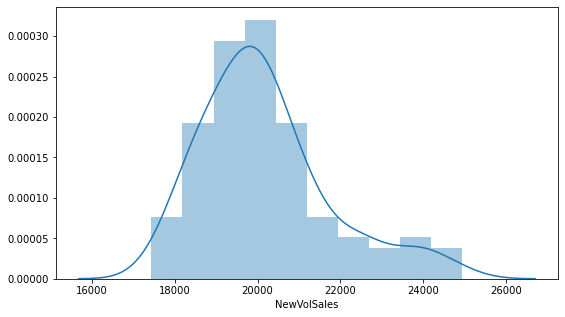

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# распределение объемов продаж

fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns_plot = sns.distplot(y)
fig = sns_plot.get_figure()

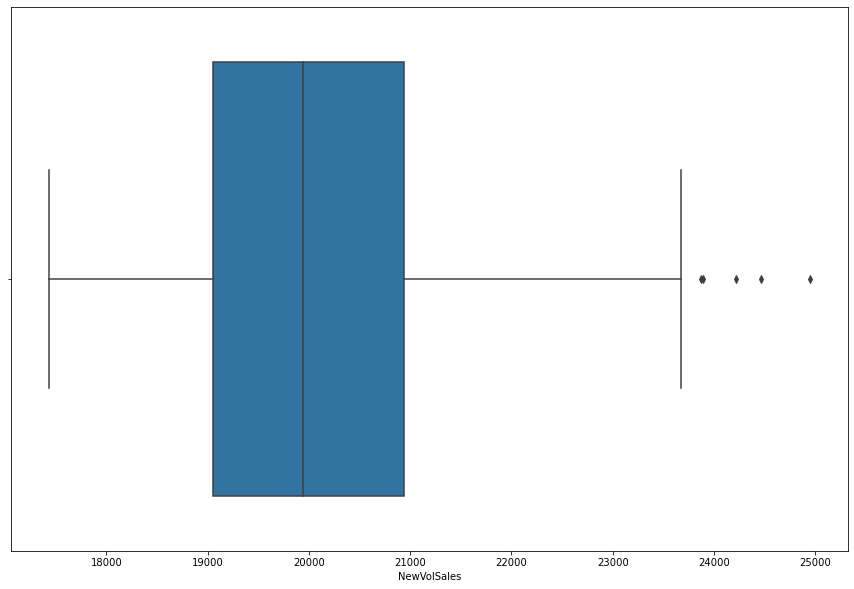

In [32]:
# About the Dataset
# The data contains the sales data for two consecutive years of a particular product of some brand.

# Each row contains the Volume of Sales for a week and different campaigning information 
# or various promotion methods for that product information for each week for two consecutive years.


ax = sns.boxplot(x = y) # видим, что средние объемы продаж по неделям приходятся на 20 тыс., в то же время имеются некоторые
# аномальные значения - > 24к, видимо, как-то связанные с различными методами реклыми (various promotion methods)

<Figure size 504x360 with 0 Axes>

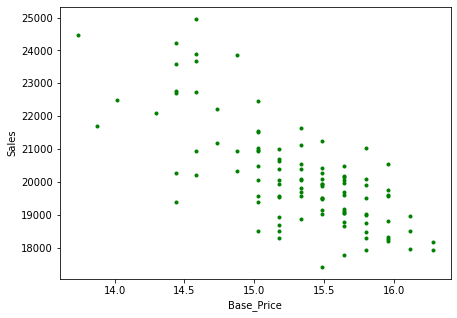

<Figure size 504x360 with 0 Axes>

In [42]:
plt.figure(figsize=(7, 5))
plt.plot(x['Base_Price'], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('Base_Price')
plt.figure(figsize=(7, 5))

# тут видим очевидную отрицательную корреляцию (обратную зависимость) между размером цены на продукт и объемом его продаж, 
# что достаточно логично 

<Figure size 504x360 with 0 Axes>

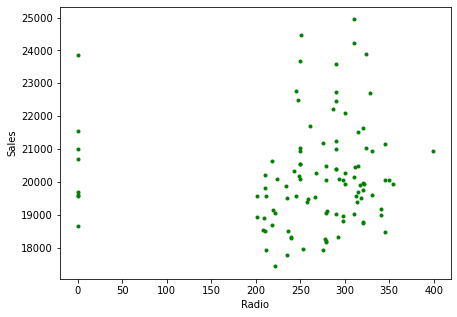

<Figure size 504x360 with 0 Axes>

In [35]:
plt.figure(figsize=(7, 5))
plt.plot(x['Radio '], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.figure(figsize=(7, 5))
# я не очень уверена, но пусть будет, что в радио даны показатели объема денежных(???) средств, потраченных на рекламу
# можем отметить, что при увеличении затрат на рекламу на радио, увеличивается и объемы продаж

<Figure size 504x360 with 0 Axes>

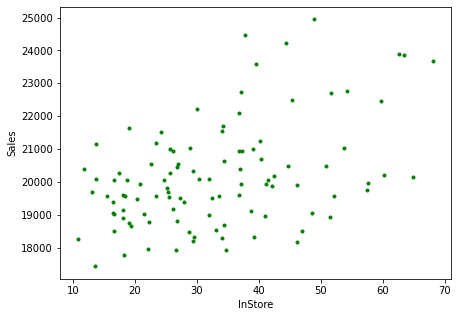

<Figure size 504x360 with 0 Axes>

In [36]:
plt.figure(figsize=(7, 5))
plt.plot(x['InStore'], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('InStore')
plt.figure(figsize=(7, 5))

# здесь наблюдаем распределение объемов продаж от рекламы (вероятно) в стенах магазина?
# тут, в принципе, прослеживается очевидная зависимость - можем отметить, что чем больше показатель inStore, чем выше объем продаж
# я бы отметила оптимальный отрезок трат на рекламу этого рода от 40 до 60

<Figure size 504x360 with 0 Axes>

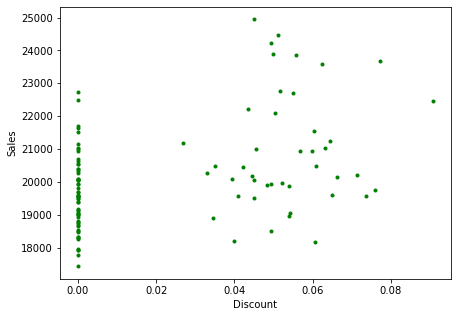

<Figure size 504x360 with 0 Axes>

In [37]:
plt.figure(figsize=(7, 5))
plt.plot(x['Discount'], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('Discount')
plt.figure(figsize=(7, 5))

# тут наблюдаем зависимость от наличия скидок и их размера. 
# тоже все довольно логично - есть скидка - больше продажи

<Figure size 504x360 with 0 Axes>

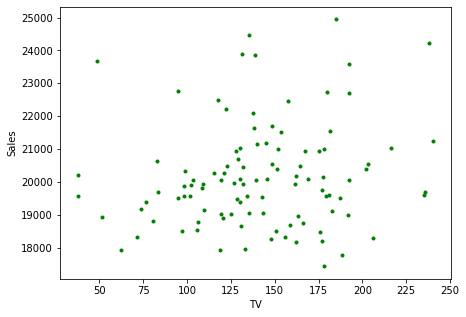

<Figure size 504x360 with 0 Axes>

In [38]:
plt.figure(figsize=(7, 5))
plt.plot(x['TV'], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.figure(figsize=(7, 5))

# зависимость от рекламы на ТВ, средний объем продаж приходится на промежуток [100, 200]

<Figure size 504x360 with 0 Axes>

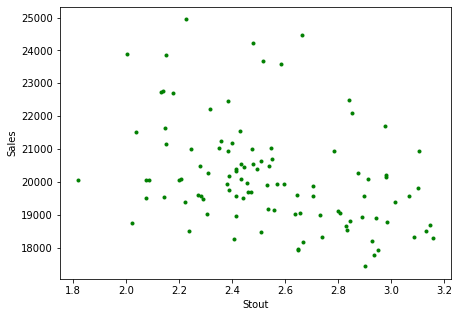

<Figure size 504x360 with 0 Axes>

In [39]:
plt.figure(figsize=(7, 5))
plt.plot(x['Stout'], y,'.', c = 'green')
plt.ylabel('Sales')
plt.xlabel('Stout')
plt.figure(figsize=(7, 5))

# я не знаю, что в этом датасете означет Stout, но при увелечинении затрат на этот параметр наблюдается явная обратная зависимость
# сюда бы лучше не особо направлять средства, можно ограничиться значением в 2.4-2.6, для достижения средних объемов продаж

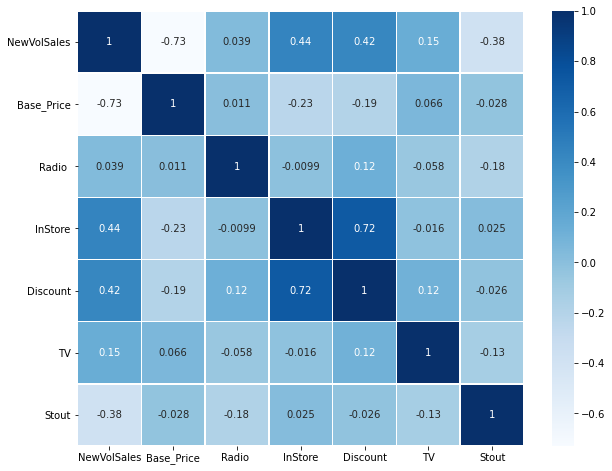

In [40]:
# посмотрим теперь матрицу корреляции
plt.figure(figsize = (10, 8))
sns.heatmap(data_1.corr(), annot = True, linewidths=.5, cmap = 'Blues')
plt.show()

# выводы по графику - высока корреляция (> 0.8) отсутствует, значит все параметры здесь значимые и ничего убирать не стоит
# как было раньше сказано, присутствует достаточно сильная отрицательная корреляция между ценой на продукт и его продажей
# и тоже (раньше было отмечено), что Stout (чем бы это ни было) - отрицательно влияет на объем продаж (при росте финансирования в этот параметр)
# видим хорошую корреляцию между уровнем скидки и рекламой в магазине(InStore)

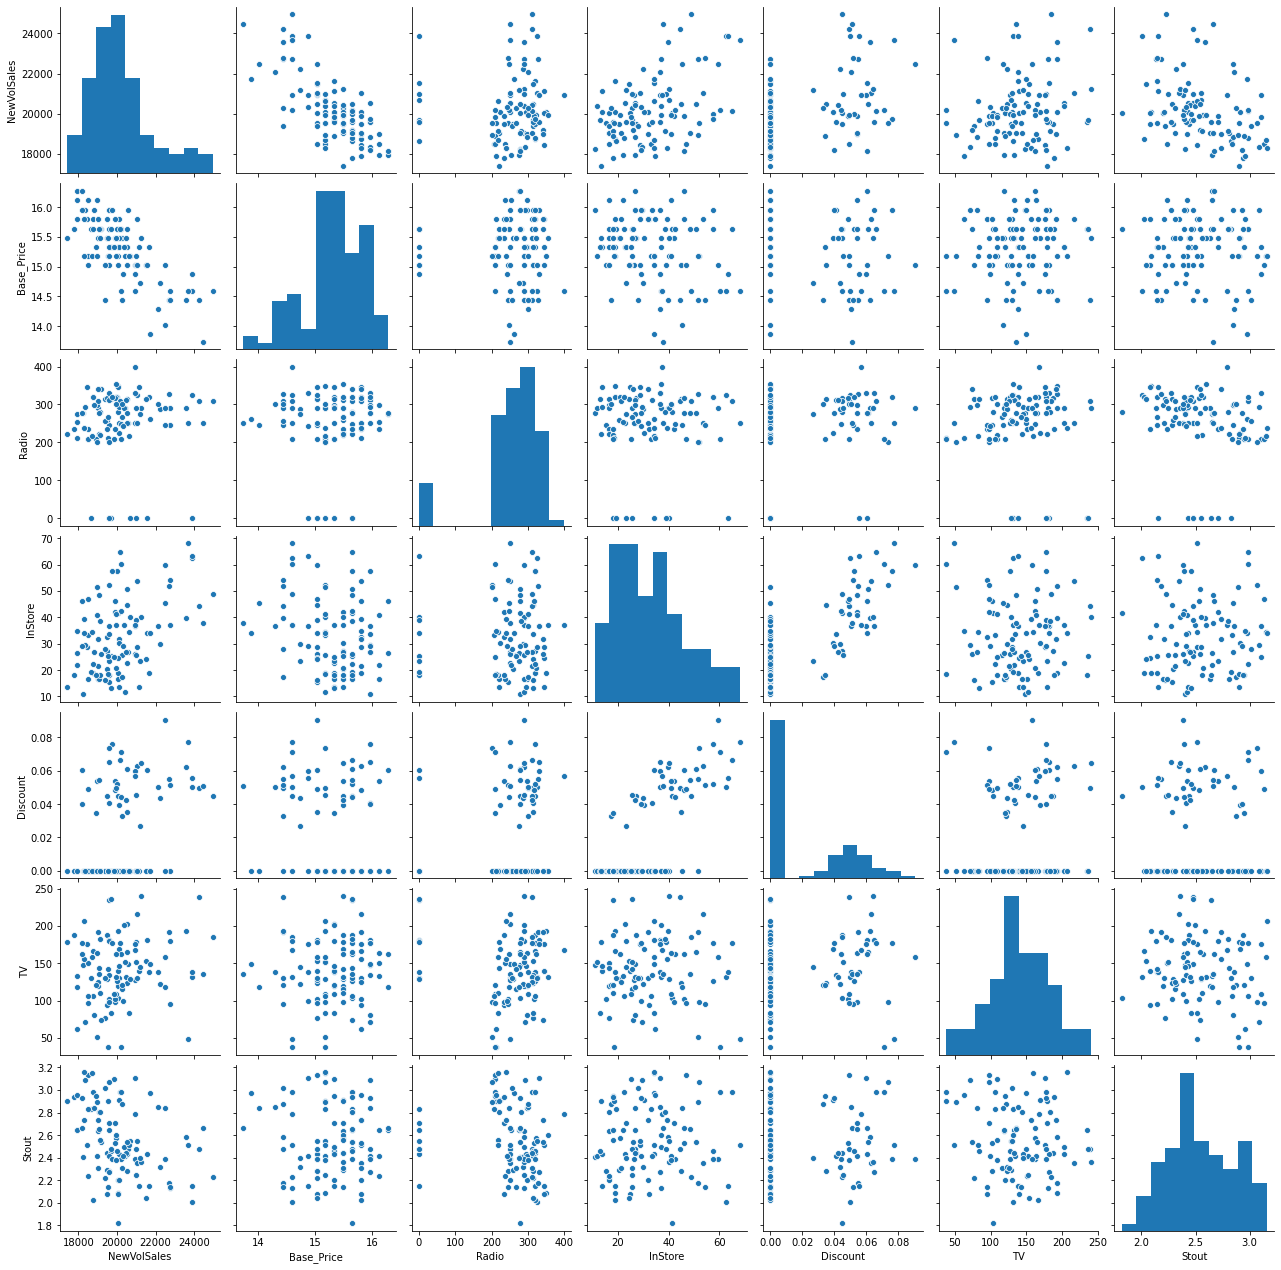

In [41]:
import seaborn as sns
ax = sns.pairplot(data_1)

# те же самые рассуждения подтверждаем с помощью графиков корреляции между параметрами

In [43]:
# категориальных данных у нас нет, здесь провести какой-либо анализ нет возможности

In [44]:
# рассмотрим отдельно зависимость некоторых параметров

In [48]:
data_1.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout'],
      dtype='object')

Text(0.5, 1.0, 'Распредление объма в зависимости от рекламы по радио')

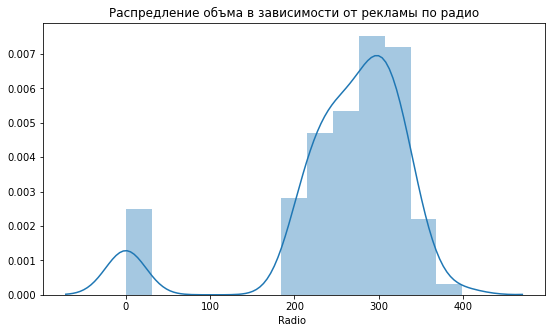

In [52]:
# посмотрим, в каких случаях у нас получаются наибольшие продажи (больше среднего)
# таким образом, можем подстроить наше финансирование на рекламу с целью достижения больших продаж

fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns_plot = sns.distplot(data_1.loc[data_1['NewVolSales'] >= 20]['Radio '])
fig = sns_plot.get_figure()
plt.title('Распредление объма в зависимости от рекламы по радио')

Text(0.5, 1.0, 'Распредление объма в зависимости от рекламы в магазине')

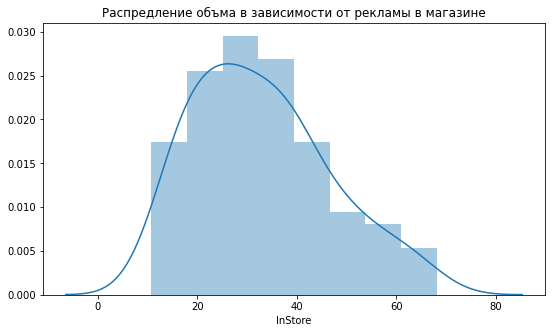

In [54]:
# тоже самое посмотрим на Instore и скидках (при желании можно глянуть на всем, но я возьму то, где наибольшая корреляция)
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns_plot = sns.distplot(data_1.loc[data_1['NewVolSales'] >= 20]['InStore'])
fig = sns_plot.get_figure()
plt.title('Распредление объма в зависимости от рекламы в магазине')

# как я тоже раньше делала утверждение, что оптимальными границами является [20,40] для рекламы в магазине - здесь это подтверждаем

Text(0.5, 1.0, 'Распредление объма в зависимости от размеров скидок')

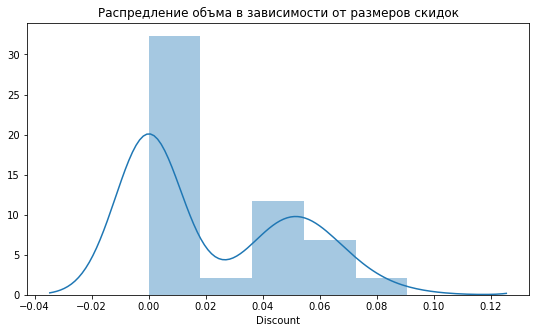

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns_plot = sns.distplot(data_1.loc[data_1['NewVolSales'] >= 20]['Discount'])
fig = sns_plot.get_figure()
plt.title('Распредление объма в зависимости от размеров скидок')

# видимо, слишком большие скидки не являются сильным катализатором продаж

### Создание и обучение модели

In [56]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 25)

In [63]:
from sklearn.metrics import f1_score

In [69]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(xtrain, ytrain)
y_train_pred = lreg.predict(xtrain)
y_test_pred = lreg.predict(xtest)
lreg.score(xtest,ytest)

# линейная регрессия показывает хороший результат

0.8112787575700975

In [71]:
# посмотрим, как справилась с предсказанием объема продаж наша модель - и видим, что значения получились достаточно соответствующие

pred =pd.DataFrame({
    'real': ytest,
    'pred': y_test_pred
})

In [72]:
pred.head()

,real,pred
6,19509,20101.0
97,18312,19126.0
46,20383,20635.0
25,20055,21139.0
75,22495,24944.0
